# Hypothesis: People tend to give higher scores to movies compared to movie critics

# Importing the dataset

In [42]:
import pandas as pd
import numpy as np

In [43]:
movies = pd.read_csv('rotten_tomatoes_top_movies.csv', index_col=0)

In [44]:
movies.tail() #checking what data is inside

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
1605,Priest,2011,In a society ravaged by centuries of war betwe...,15,46.0,"Sleek and stylish, but those qualities are was...",101,"50,000+",Western,PG-13 (Disturbing Images|Brief Strong Language...,...,"May 13, 2011 wide","Apr 16, 2012",$29.1M,1h 27m,"Michael De Luca, Stars Road Entertainment","SDDS, Dolby Digital",NaN,NaN,"Paul Bettany, Karl Urban, Cam Gigandet, Maggie...",http://www.rottentomatoes.com/m/10009274-priest
1606,September Dawn,2006,In 1857 Capt. Alexander Fancher leads a wagon ...,16,49.0,"With its jarring editing, dull love story, and...",55,"5,000+",Western,R (Violence),...,"Jun 22, 2007 wide","Jan 1, 2008",$1.1M,1h 50m,"Voice Pictures Inc., September Dawn LLC",NaN,NaN,NaN,"Jon Voight, Trent Ford, Tamara Hope, Jon Gries...",http://www.rottentomatoes.com/m/september_dawn
1607,American Outlaws,2001,"After the Civil War ends, Confederate soldiers...",14,68.0,"With corny dialogue, revisionist history, anac...",103,"25,000+",Western,PG-13 (Western Violence),...,"Aug 17, 2001 wide","Dec 1, 2017",$13.3M,1h 33m,Morgan Creek Productions,"Dolby Stereo, Dolby A, SDDS, DTS, Surround, Do...",Flat (1.85:1),NaN,"Colin Farrell, Scott Caan, Ali Larter, Gabriel...",http://www.rottentomatoes.com/m/american_outlaws
1608,Jonah Hex,2010,"Having cheated death, gunslinger and bounty hu...",12,20.0,"Josh Brolin gives it his best shot, but he can...",152,"100,000+",Western,PG-13 (Intense Sequences of Action|Disturbing ...,...,"Jun 18, 2010 wide","Mar 30, 2012",$10.5M,1h 21m,"Mad Chance, Weed Road Pictures",NaN,NaN,NaN,"Josh Brolin, John Malkovich, Megan Fox, Michae...",http://www.rottentomatoes.com/m/jonah_hex
1609,Texas Rangers,2001,"Texas, 1875. In a land without justice, where ...",2,29.0,"As far as westerns go, Texas Rangers is strict...",51,"5,000+",Western,PG-13 (Western Violence),...,"Nov 30, 2001 wide","Oct 8, 2016",$623.4K,1h 30m,"Greisman Productions, Price Entertainment, Lar...","Dolby Stereo, Dolby Digital, Dolby A, Surround...",Scope (2.35:1),NaN,"James Van Der Beek, Dylan McDermott, Usher Ray...",http://www.rottentomatoes.com/m/1111103-texas_...


In [45]:
movies.info() #checking what data is inside

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     1610 non-null   object 
 1   year                      1610 non-null   int64  
 2   synopsis                  1602 non-null   object 
 3   critic_score              1610 non-null   int64  
 4   people_score              1609 non-null   float64
 5   consensus                 1593 non-null   object 
 6   total_reviews             1610 non-null   int64  
 7   total_ratings             1610 non-null   object 
 8   type                      1610 non-null   object 
 9   rating                    1139 non-null   object 
 10  genre                     1603 non-null   object 
 11  original_language         1570 non-null   object 
 12  director                  1609 non-null   object 
 13  producer                  1490 non-null   object 
 14  writer  

In [46]:
movies['genre'] = pd.Categorical(movies['genre']) #seeting genre to category <-- gonna use it
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   title                     1610 non-null   object  
 1   year                      1610 non-null   int64   
 2   synopsis                  1602 non-null   object  
 3   critic_score              1610 non-null   int64   
 4   people_score              1609 non-null   float64 
 5   consensus                 1593 non-null   object  
 6   total_reviews             1610 non-null   int64   
 7   total_ratings             1610 non-null   object  
 8   type                      1610 non-null   object  
 9   rating                    1139 non-null   object  
 10  genre                     1603 non-null   category
 11  original_language         1570 non-null   object  
 12  director                  1609 non-null   object  
 13  producer                  1490 non-null   object

In [47]:
movies.describe() #checking the numbers

,year,critic_score,people_score,total_reviews
count,1610.000000,1610.000000,1609.000000,1610.000000
mean,1991.745963,92.693789,83.405221,143.652174
std,28.054120,11.621759,11.263792,118.137144
min,1919.000000,2.000000,10.000000,39.000000
25%,1969.000000,92.000000,80.000000,56.000000
50%,2005.000000,96.000000,87.000000,90.000000
75%,2014.000000,98.000000,91.000000,205.750000
max,2020.000000,100.000000,98.000000,561.000000


## Trimming out the dataset

In [48]:
movies.columns #geting the titles of all the columns

Index(['title', 'year', 'synopsis', 'critic_score', 'people_score',
       'consensus', 'total_reviews', 'total_ratings', 'type', 'rating',
       'genre', 'original_language', 'director', 'producer', 'writer',
       'release_date_(theaters)', 'release_date_(streaming)',
       'box_office_(gross_usa)', 'runtime', 'production_co', 'sound_mix',
       'aspect_ratio', 'view_the_collection', 'crew', 'link'],
      dtype='object')

In [49]:
movies_f = movies[['title', 'year', 'critic_score', 'people_score','genre']] #selecting the columns that are of interest

In [50]:
movies_f.head() #preview of the trimmed result

,title,year,critic_score,people_score,genre
0,Black Panther,2018,96,79.0,"adventure, action, fantasy"
1,Avengers: Endgame,2019,94,90.0,"sci fi, adventure, action, fantasy"
2,Mission: Impossible -- Fallout,2018,97,88.0,"action, mystery and thriller, adventure"
3,Mad Max: Fury Road,2015,97,86.0,"adventure, action"
4,Spider-Man: Into the Spider-Verse,2018,97,93.0,"action, adventure, fantasy, comedy, kids and f..."


In [51]:
movies_f.info() #review of the entry tipes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   title         1610 non-null   object  
 1   year          1610 non-null   int64   
 2   critic_score  1610 non-null   int64   
 3   people_score  1609 non-null   float64 
 4   genre         1603 non-null   category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 76.2+ KB


---
# Analizing the trimmed dataset

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #setting the graphics

In [53]:
# preparing to add new column
l1 = []
for number in range(0, 1610):
    if type(movies_f.loc[number]['genre']) != float:
        new = movies_f.loc[number]['genre'].split(", ")[0]
        l1.append(new)
    else:
        l1.append('no genre')



In [112]:
movies_f['genre_single'] = l1 #adding new column [was too lazy to fix the warning message]

/var/folders/7c/60zcq1pn4gbf6yrdtdr9nm040000gn/T/ipykernel_11749/3114762116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_f['genre_single'] = l1 #adding new column [was too lazy to fix the warning message]


In [55]:
movies_f.tail() #checking if the column is added

,title,year,critic_score,people_score,genre,genre_single
1605,Priest,2011,15,46.0,"horror, action, fantasy",horror
1606,September Dawn,2006,16,49.0,"drama, history, western",drama
1607,American Outlaws,2001,14,68.0,"western, action",western
1608,Jonah Hex,2010,12,20.0,"mystery and thriller, fantasy, action, western...",mystery and thriller
1609,Texas Rangers,2001,2,29.0,"western, adventure",western


In [56]:
movies_f.groupby('genre_single')['genre_single'].count() #counting the number of entries by genre

genre_single
action                   44
adventure                59
animation                11
anime                     1
biography                 2
comedy                  271
crime                    65
documentary             244
drama                   264
fantasy                  28
gay and lesbian          25
history                   5
horror                   59
kids and family         139
music                    23
musical                  23
mystery and thriller    161
no genre                  7
other                     2
romance                  60
sci fi                   49
sports and fitness        3
war                       6
western                  59
Name: genre_single, dtype: int64

In [57]:
# checking how overrated the movies are in 2000 and beyond
x = len(movies_f[ (movies_f['year'] >= 2000) & (movies_f['critic_score'] - movies_f['people_score'] >= 20) ])
print(f'Number of movies for 2000 and beyond that are substantially overrated by critics when compared to people opinion: {x}')
y = len(movies_f[ (movies_f['year'] >= 2000) & (movies_f['people_score'] - movies_f['critic_score'] >= 20) ])
print(f'Number of movies for 2000 and beyond that are substantially overrated by people when compared to critic opinion: {y}')
print(f'For 2000 and beyond Number of substantial overratings by critics is {round((x/y), 1)} times higher compared to substantial overratings by people')

Number of movies for 2000 and beyond that are substantially overrated by critics when compared to people opinion: 161
Number of movies for 2000 and beyond that are substantially overrated by people when compared to critic opinion: 21
For 2000 and beyond Number of substantial overratings by critics is 7.7 times higher compared to substantial overratings by people


In [108]:
print('Extremely overrated movies by critics:')
movies_f[ (movies_f['year'] >= 2000) & (movies_f['critic_score'] - movies_f['people_score'] >= 50) ][['title', 'genre_single', 'year']]


Extremely overrated movies by critics:


,title,genre_single,year
521,Knock Down the House,documentary,2019
656,Never Rarely Sometimes Always,drama,2020


In [111]:
print('Extremely overrated movies by people:')
movies_f[ (movies_f['year'] >= 2000) & (movies_f['people_score'] - movies_f['critic_score'] >= 50) ][['title', 'genre_single', 'year']]

Extremely overrated movies by people:


,title,genre_single,year
1607,American Outlaws,western,2001


In [58]:
movies_f[movies_f['genre_single'] == 'comedy'].describe() #checking the stat info on the most popular category

,year,critic_score,people_score
count,271.000000,271.000000,270.000000
mean,1993.726937,91.324723,82.822222
std,28.309781,13.936021,11.556145
min,1921.000000,10.000000,28.000000
25%,1974.000000,91.000000,78.000000
50%,2006.000000,95.000000,86.000000
75%,2017.000000,97.500000,91.000000
max,2020.000000,100.000000,96.000000


---
# Visualising the trimmed dataset

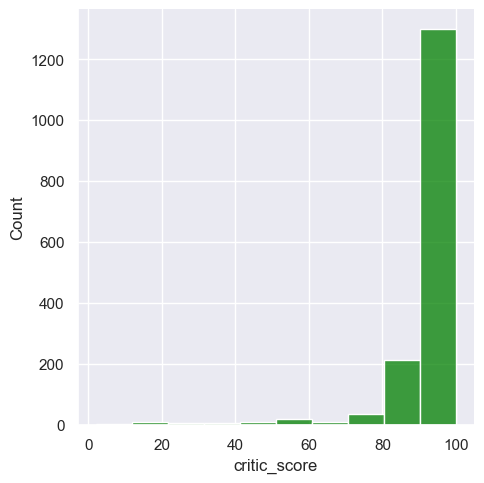

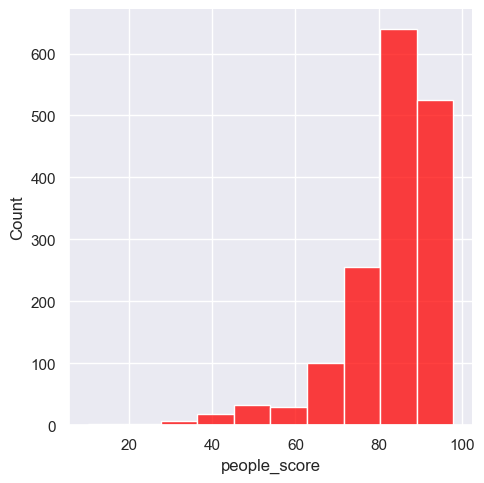

In [59]:
# checking the scores in bins by critics and people
vis4 = sns.displot(movies_f['critic_score'], bins = 10, color = 'green')
vis5 = sns.displot(movies_f['people_score'], bins = 10, color= 'red')



### NOTE: Dataset has unexpectidly good ratings by the critics when compared to people

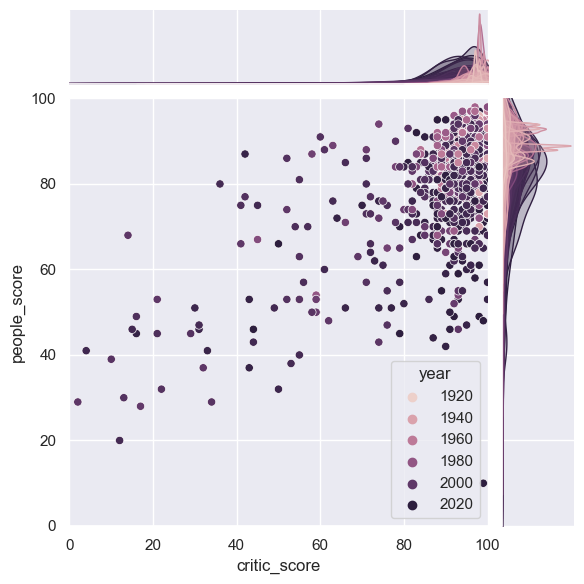

In [60]:
# Visualising scritic score against people score; colour coding for decades
vis2 = sns.jointplot(data = movies_f, x = 'critic_score', y = 'people_score', xlim=(0,100), ylim=(0,100), hue= 'year')

### Note: Critics tend to give higher scores compared to people

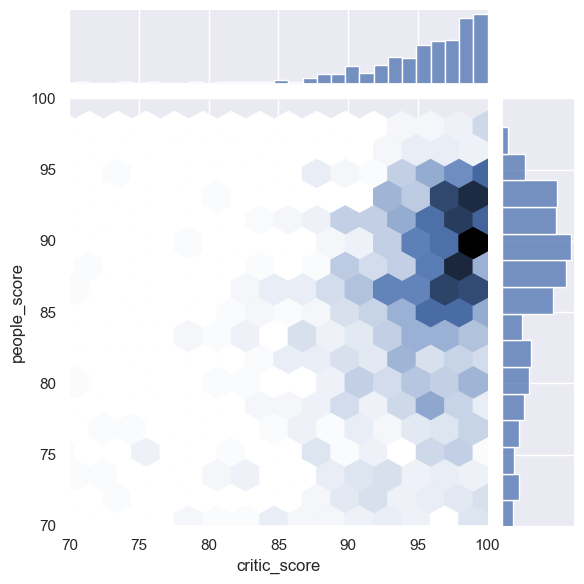

In [61]:
# Zooming into ratings above 70
vis2 = sns.jointplot(data = movies_f, x = 'critic_score', y = 'people_score', kind = 'hex', xlim= [70,100], ylim=[70,100])

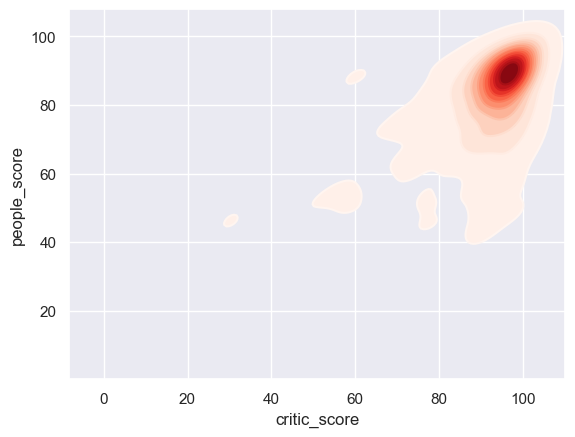

In [62]:
# KDE plot to represent the distribution of score in easily to view mode
vis3 = sns.kdeplot(x = movies_f['critic_score'], y = movies_f['people_score'], shade = True, thresh = 0.05, cmap = 'Reds')
vis3b = sns.kdeplot(x = movies_f['critic_score'], y = movies_f['people_score'], cmap = 'Reds') #adding countour for better visuals

# Detailed visualisation of scores for the best represented genre in the dataset: Comedy and Drama

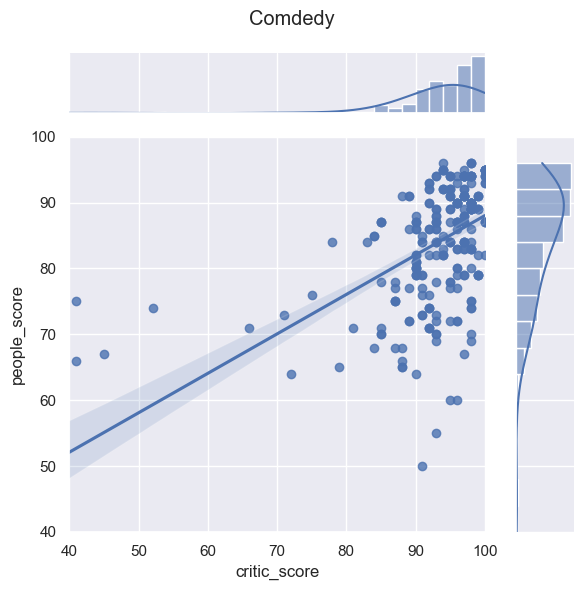

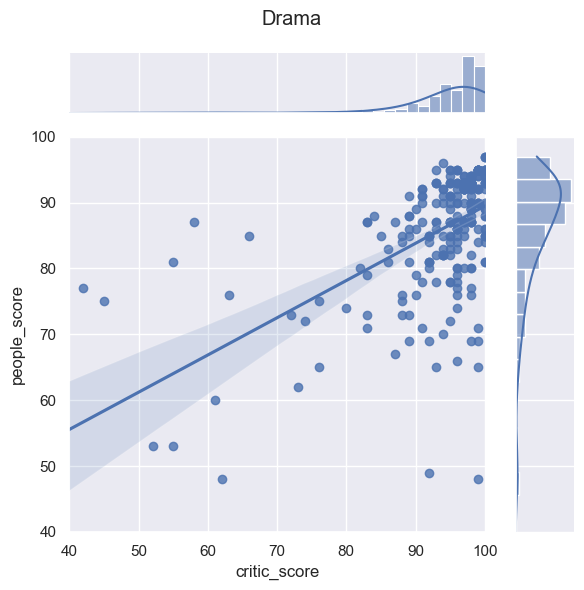

In [63]:
vis6 = sns.jointplot(data = movies_f[movies_f['genre_single'] == 'comedy'], x = 'critic_score', y = 'people_score', xlim=(40,100), ylim=(40,100), kind = 'reg')
vis6.fig.suptitle("Comdedy")
vis6.fig.tight_layout()
vis7 = sns.jointplot(data = movies_f[movies_f['genre_single'] == 'drama'], x = 'critic_score', y = 'people_score', xlim=(40,100), ylim=(40,100), kind = 'reg')
vis7.fig.suptitle("Drama")
vis7.fig.tight_layout()

### NOTE: For Comedy and Drama - people are giving lower scores than critics

---
# Review of scores by critics and people in decades for Comedy genre

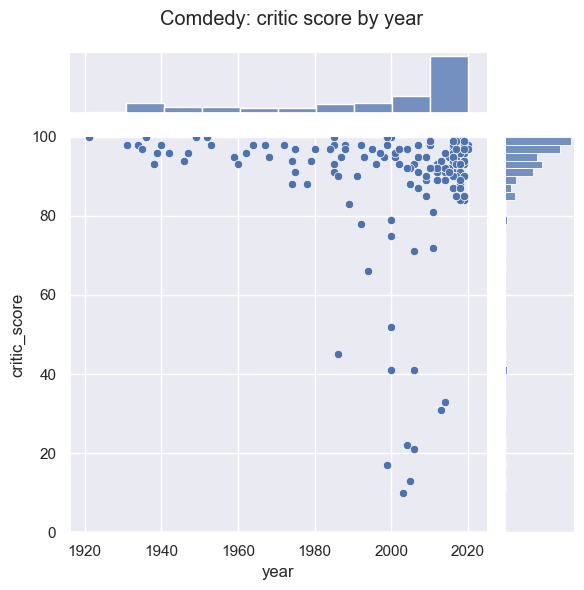

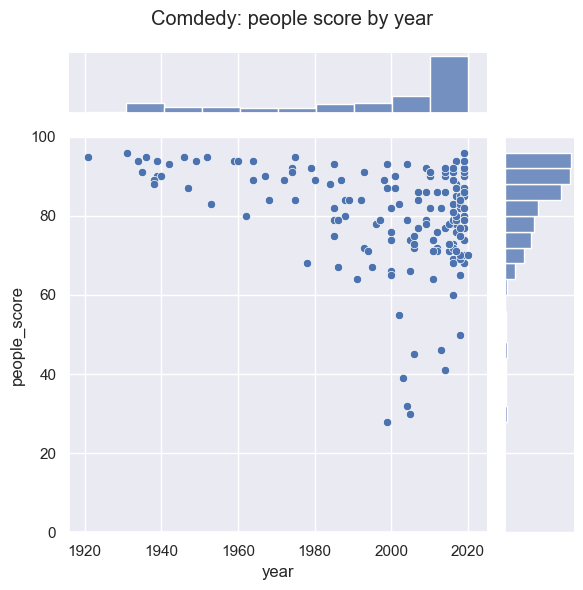

In [64]:
vis8 = sns.jointplot(data = movies_f[movies_f['genre_single'] == 'comedy'], y = 'critic_score', x = 'year', ylim=(0,100))
vis8.fig.suptitle("Comdedy: critic score by year")
vis8.fig.tight_layout()
vis9 = sns.jointplot(data = movies_f[movies_f['genre_single'] == 'comedy'], y = 'people_score', x = 'year', ylim=(0,100))
vis9.fig.suptitle("Comdedy: people score by year")
vis9.fig.tight_layout()

# Final thoughts: hypothesis was false, critics tend to give higher scores than people based on the analysed dataset. In the perior form 2020 till the end of dataset, number of substantial overratings by critics is 7.7 times higher compared to substantial overratings by people
# For the best represented genre (Comdeies) people have given substantially lower rating in the 2000 - 2020 period